A Zomato data science project is a fantastic way to dive into real-world analytics using restaurant data. It’s especially relevant if you're interested in consumer behavior, food trends, or urban dining patterns. Here's a breakdown of what such a project typically involves:
**🍽️ Project Overview**
**- Objective:** Analyze Zomato’s restaurant dataset to uncover insights about customer preferences, restaurant types, ratings, and pricing.
- Dataset Source: Available on Kaggle as zomato.csv, featuring thousands of restaurants with attributes like name, location, cuisine, rating, and delivery options.
**🧠 Key Steps in the Project**
**- Data Cleaning**
- Handle missing values and inconsistent formats (e.g., ratings like “4.1/5”).
- Remove duplicates and irrelevant columns like phone numbers or URLs.
**- Exploratory Data Analysis (EDA)**
- Use Python libraries like Pandas, Matplotlib, and Seaborn.
- Visualize distributions of ratings, cost for two, cuisine popularity, and restaurant types.
**- Insights Generation**
- Identify which restaurant types are most popular.
- Compare ratings between online and offline order modes.
- Discover preferred price ranges for couples dining out.


In [23]:
#step 0 importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

In [6]:
#step 1 load data
df = pd.read_csv("zomato.csv.zip")
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [14]:
#step 2 data processing
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [15]:
df['rate'] = df['rate'].astype(str).str.replace("/5", "").replace("NEW", "0").replace("-", "0")
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'] = df['rate'].fillna(df['rate'].mean())

In [17]:
df["phone"] = df["phone"].fillna("not provided")

In [18]:
df["dish_liked"] = df["dish_liked"].fillna("no info")

In [21]:
df["approx_cost(for two people)"] = df['approx_cost(for two people)'].astype(str).str.replace(",","")
df['approx_cost(for two people)'] = pd.to_numeric(df["approx_cost(for two people)"],errors = "coerce")
df['approx_cost(for two people)'] = df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].mean())

In [22]:
df["location"] = df["location"].fillna(df['location'].mode()[0])
df["rest_type"] = df["rest_type"].fillna(df["rest_type"].mode()[0])
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])

In [26]:
#step 3 data encoding
le = LabelEncoder()
df["online_order"] = df["online_order"].map({'Yes' :1, 'No':0})
df['book_table'] = df['book_table'].map({'Yes' : 1 ,'No':0})

In [28]:
df["location"] = le.fit_transform(df['location'])
df["name"] = le.fit_transform(df['name'])
df['cuisines'] = le.fit_transform(df["cuisines"])
df['rest_type'] = le.fit_transform(df['rest_type'])

In [29]:
df = pd.get_dummies(df, columns=['listed_in(type)', 'listed_in(city)'], drop_first=True)

In [35]:
#step 4 EDA
print(df.shape)   # (rows, columns)
print(df.size)    # Total number of elements (rows × columns)
print(df.info())   # Summary of columns, non-null counts, types
print(df.dtypes)   # Use .dtypes (not .dtype()) to get types of each column
print(df.describe())   # Count, mean, std, min, max (only for numeric columns)
print(df.nunique())   # Also an attribute — remove the ()

(51717, 50)
2585850
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   url                                    51717 non-null  object 
 1   address                                51717 non-null  object 
 2   name                                   51717 non-null  int64  
 3   online_order                           51717 non-null  int64  
 4   book_table                             51717 non-null  int64  
 5   rate                                   51717 non-null  float64
 6   votes                                  51717 non-null  int64  
 7   phone                                  51717 non-null  object 
 8   location                               51717 non-null  int64  
 9   rest_type                              51717 non-null  int64  
 10  dish_liked                             51717 non-n

Text(0, 0.5, 'frequency')

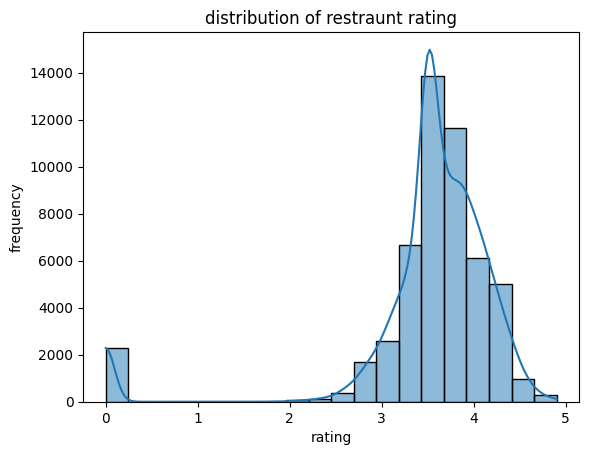

In [42]:
# rating distribution
sns.histplot(df["rate"],bins = 20,kde = True)
plt.title("distribution of restraunt rating")
plt.xlabel("rating")
plt.ylabel("frequency")

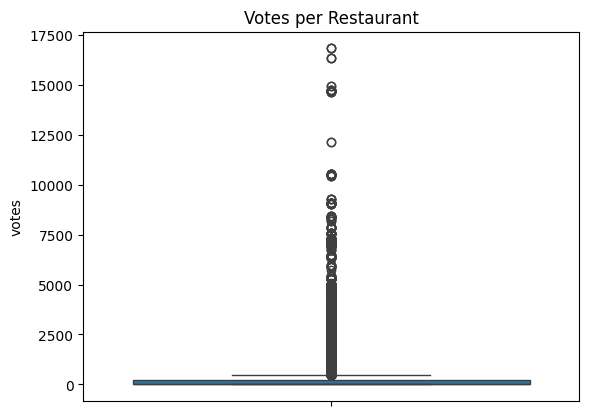

In [37]:
# votes spread
sns.boxplot(y=df['votes'])
plt.title('Votes per Restaurant')
plt.show()

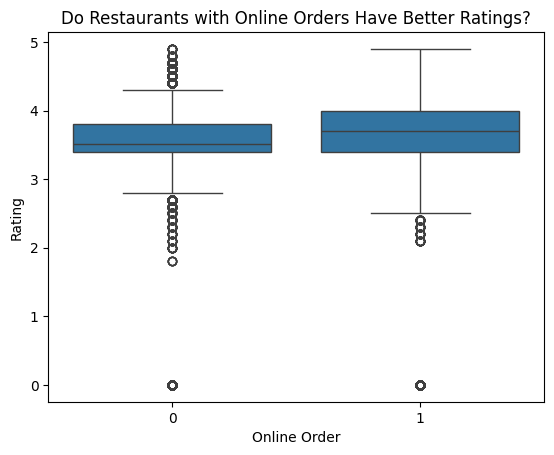

In [38]:
# online order impact
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Do Restaurants with Online Orders Have Better Ratings?')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()

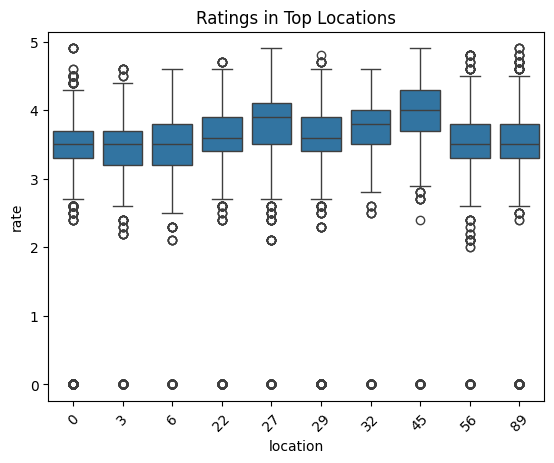

In [39]:
# location trends
top_locations = df['location'].value_counts().nlargest(10).index
sns.boxplot(x='location', y='rate', data=df[df['location'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title('Ratings in Top Locations')
plt.show()

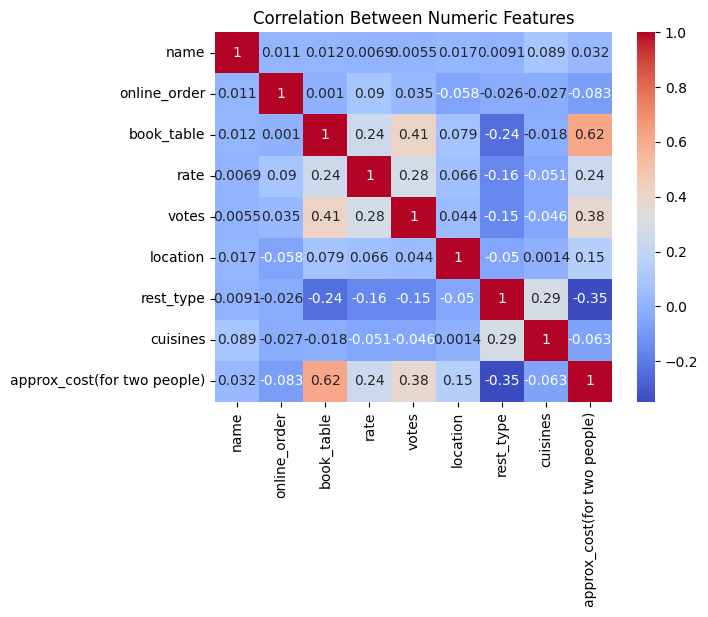

In [40]:
# corelation heatmap
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

In [ ]:
#step 0 importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

#step 1 load data
df = pd.read_csv("zomato.csv.zip")
print(df.head(10))

#step 2 data processing
print(df.isnull().sum())

df['rate'] = df['rate'].astype(str).str.replace("/5", "").replace("NEW", "0").replace("-", "0")
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'] = df['rate'].fillna(df['rate'].mean())

df["phone"] = df["phone"].fillna("not provided")
df["dish_liked"] = df["dish_liked"].fillna("no info")

df["approx_cost(for two people)"] = df['approx_cost(for two people)'].astype(str).str.replace(",","")
df['approx_cost(for two people)'] = pd.to_numeric(df["approx_cost(for two people)"],errors = "coerce")
df['approx_cost(for two people)'] = df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].mean())

df["location"] = df["location"].fillna(df['location'].mode()[0])
df["rest_type"] = df["rest_type"].fillna(df["rest_type"].mode()[0])
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])

#step 3 data encoding
le = LabelEncoder()
df["online_order"] = df["online_order"].map({'Yes' :1, 'No':0})
df['book_table'] = df['book_table'].map({'Yes' : 1 ,'No':0})

df["location"] = le.fit_transform(df['location'])
df["name"] = le.fit_transform(df['name'])
df['cuisines'] = le.fit_transform(df["cuisines"])
df['rest_type'] = le.fit_transform(df['rest_type'])

df = pd.get_dummies(df, columns=['listed_in(type)', 'listed_in(city)'], drop_first=True)

#step 4 EDA
print(df.shape)
print(df.size)
print(df.info())
print(df.dtypes)
print(df.describe())
print(df.nunique())

# rating distribution
sns.histplot(df["rate"],bins = 20,kde = True)
plt.title("distribution of restraunt rating")
plt.xlabel("rating")
plt.ylabel("frequency")
plt.show()

# votes spread
sns.boxplot(y=df['votes'])
plt.title('Votes per Restaurant')
plt.show()

# online order impact
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Do Restaurants with Online Orders Have Better Ratings?')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()

# location trends
top_locations = df['location'].value_counts().nlargest(10).index
sns.boxplot(x='location', y='rate', data=df[df['location'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title('Ratings in Top Locations')
plt.show()

# corelation heatmap
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

In [47]:
#step 5 predictive modelling
x = df.drop(['rate', 'url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'],axis= 1)
y = df['rate']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [50]:
# model1 linear regression
l1 = LinearRegression()
l1.fit(x_train,y_train)
print("linear regression r2 score:",l1.score(x_test,y_test))

linear regression r2 score: 0.13373408898090744


In [51]:
#model 2  random forest
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print("random forest r2 score :",rf.score(x_test,y_test))

random forest r2 score : 0.7329365557124619


In [52]:
# save model
import joblib
joblib.dump(rf, "restaurant_rating_model.pkl")

['restaurant_rating_model.pkl']

In [53]:
model = joblib.load("restaurant_rating_model.pkl")

In [54]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [55]:
# app.py
import streamlit as st
import joblib

st.title("Restaurant Rating Predictor")

# Load model
model = joblib.load("restaurant_rating_model.pkl")

# Input fields
cost = st.number_input("Approx Cost (for two)", min_value=0)
votes = st.number_input("Total Votes", min_value=0)
online_order = st.radio("Online Order Available?", ["Yes", "No"])
book_table = st.radio("Table Booking Available?", ["Yes", "No"])

# Predict
input_data = [[cost, votes, 1 if online_order=="Yes" else 0, 1 if book_table=="Yes" else 0]]
prediction = model.predict(input_data)

st.success(f"Predicted Rating: {round(prediction[0], 2)}")

2025-07-26 08:19:16.184 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 08:19:16.419 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-26 08:19:16.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 08:19:16.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 08:19:16.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 08:19:16.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 08:19:16.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 08:19:16.993 Thread 'MainThread': mi

ValueError: X has 4 features, but RandomForestRegressor is expecting 43 features as input.

In [59]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

model = joblib.load("restaurant_rating_model.pkl")

# Load structure from training data
template = pd.read_csv("zomato.csv.zip")

# Drop unnecessary columns, isolate feature columns
X_template = template.drop(['rate', 'url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1)

# Preprocess the template to match the training data
X_template["approx_cost(for two people)"] = X_template['approx_cost(for two people)'].astype(str).str.replace(",","")
X_template['approx_cost(for two people)'] = pd.to_numeric(X_template["approx_cost(for two people)"],errors = "coerce")


le = LabelEncoder()
X_template["online_order"] = X_template["online_order"].map({'Yes' :1, 'No':0})
X_template['book_table'] = X_template['book_table'].map({'Yes' : 1 ,'No':0})

X_template["location"] = le.fit_transform(X_template['location'])
X_template["name"] = le.fit_transform(X_template['name'])
X_template['cuisines'] = le.fit_transform(X_template["cuisines"])
X_template['rest_type'] = le.fit_transform(X_template['rest_type'])

# One-hot encode the same columns as the training data
X_template = pd.get_dummies(X_template, columns=['listed_in(type)', 'listed_in(city)'], drop_first=True)

X_template = X_template.head(1).copy()  # Just a single row with right structure

# Overwrite values with user input
X_template['approx_cost(for two people)'] = cost
X_template['votes'] = votes
X_template['online_order'] = 1 if online_order == "Yes" else 0
X_template['book_table'] = 1 if book_table == "Yes" else 0

# Predict
prediction = model.predict(X_template)

In [60]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load("restaurant_rating_model.pkl")

def predict_rating(cost, votes, online_order, book_table):
    # Create a dataframe with the same structure as the training data
    template = pd.read_csv("zomato.csv.zip")
    X_template = template.drop(['rate', 'url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1)

    # Preprocess the input data
    X_template["approx_cost(for two people)"] = X_template['approx_cost(for two people)'].astype(str).str.replace(",","")
    X_template['approx_cost(for two people)'] = pd.to_numeric(X_template["approx_cost(for two people)"],errors = "coerce")

    le = LabelEncoder()
    X_template["online_order"] = X_template["online_order"].map({'Yes' :1, 'No':0})
    X_template['book_table'] = X_template['book_table'].map({'Yes' : 1 ,'No':0})

    X_template["location"] = le.fit_transform(X_template['location'])
    X_template["name"] = le.fit_transform(X_template['name'])
    X_template['cuisines'] = le.fit_transform(X_template["cuisines"])
    X_template['rest_type'] = le.fit_transform(X_template['rest_type'])

    X_template = pd.get_dummies(X_template, columns=['listed_in(type)', 'listed_in(city)'], drop_first=True)

    # Create a single row of input data
    input_data = X_template.head(1).copy()

    # Overwrite with user input
    input_data['approx_cost(for two people)'] = cost
    input_data['votes'] = votes
    input_data['online_order'] = 1 if online_order == "Yes" else 0
    input_data['book_table'] = 1 if book_table == "Yes" else 0

    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# Streamlit app
st.title("Zomato Restaurant Rating Predictor")

cost = st.number_input("Approximate Cost for Two People", min_value=0)
votes = st.number_input("Number of Votes", min_value=0)
online_order = st.selectbox("Online Order Available?", ("Yes", "No"))
book_table = st.selectbox("Book Table Available?", ("Yes", "No"))

if st.button("Predict Rating"):
    rating = predict_rating(cost, votes, online_order, book_table)
    st.success(f"The predicted rating is: {rating:.2f}")

Writing app.py


In [61]:
streamlit run app.py

SyntaxError: invalid syntax (ipython-input-61-3737097518.py, line 1)